# Интегрирование в системах компьютерной алгебры: 
## от реализации классических алгоритмов XIX века к новым геометрическим интеграторам 

Малых М.Д. (https://orcid.org/0000-0001-6541-6603)

Кафедра математического моделирования и искусственного интеллекта РУДН

URL: https://esystem.rudn.ru/faculty/ffmien/departments/kafedra-informacionnyh-tehnologii-5d56957fdac0c

Январь 2025 г.

Цикл лекций дает введение в компьютерную алгебру в ее приложениях к интегрированию обыкновенных дифференциальных уравнений. В первой лекции дан обзор реализации основных конструкций алгебры полиномиальных колец в системе компьютерной алгебры Sage. Вторая лекция посвящена исследованию символьных выражений, здесь рассмотрены различные символьные интеграторы, от самых первых Слегля и Мозеса до современных. Третья лекция посвящена символьному и численному интегрированию дифференциальных уравнений в системе Sage. Обсуждаются алгебраические задачи, возникающие при проектировании разностных схем, в т.ч. разностных схем высокого порядка.  

# Лекция 3. Интегрирование дифференциальных уравнений

## Численные методы интегрирования и их реализация в Sage

В сообщении будет представлен пакет для численного интегрирования дифференциальных уравнений в системе компьютерной алгебры [Sage](https://github.com/malykhmd/fdm), ориентированный на комфортное проведение компьютерных экспериментов со схемами высокого порядка. При его создании мы держались следующих общих принципов. 
* Действия, которые могут быть выполнены аналитически, выполняются аналитически. 
* Реализации методов не зависят от поля ($\mathbb{R}, \mathbb{C}$) и тем более от числа бит, отведенных на одно число. 
* Численные решения рассматриваются как элементы нового класса, в определении которого предусмотрены инструменты для интерполяции и визуализации.
* Метод Ричардсона получения апостериорных оценок ошибок «локализован» и  отделен от реализации численных методов, для чего к численным решениям добавлены дополнительные атрибуты. 
* Реализация метода Рунге-Кутты поддерживает работу с  таблицами Бутчера любого размера, встроен инструментарий для исследования и визуализации таблиц Бутчера.  

Наша цель --- создать удобную среду для численных экспериментов с ОДУ. 

Пакет доступен для всех желающих на [github.com/malykhmd/fdm](https://github.com/malykhmd/fdm).

Альтернативы: 
* [scipy.integrate.ode](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html)
* [NodePy](https://github.com/ketch/nodepy) by D. I. Ketcheson  

### Начало работы

In [1]:
load("fdm.sage")

### Постановка начальной задачи

In [2]:
var("t,x1,x2")
pr1=Initial_problem([x1,x2],[x2,-x1],[0,1],10)

In [3]:
pr1.latex()

\left \{ \begin{aligned} &
\frac{d}{dt} x_{1} = x_{2} , \quad  \frac{d}{dt} x_{2} = -x_{1} , \\ &
x_{1} (0)= 0 , \quad x_{2} (0)= 1
\end{aligned} \right. 


$$\left \{ \begin{aligned} &
\frac{d}{dt} x_{1} = x_{2} , \quad  \frac{d}{dt} x_{2} = -x_{1} , \\ &
x_{1} (0)= 0 , \quad x_{2} (0)= 1
\end{aligned} \right. $$
### Численное решение и  его визуализация

In [4]:
s1=erk(pr1,N=20)

In [5]:
s1.list()

[[0, 0, 1],
 [0.500000000000000, 0.479166666666667, 0.877604166666667],
 [1.00000000000000, 0.841037326388889, 0.540588378906250],
 [1.50000000000000, 0.997129793520327, 0.0714255615516945],
 [2.00000000000000, 0.909310009744432, -0.415107988970883],
 [2.50000000000000, 0.599108341961540, -0.800011547073341],
 [3.00000000000000, 0.142441110884229, -0.989166214282915],
 [3.50000000000000, -0.348968565260602, -0.936349423479272],
 [4.00000000000000, -0.754923698992210, -0.654530051313969],
 [4.50000000000000, -0.976153166672253, -0.212684027807919],
 [5.00000000000000, -0.958587183034391, 0.281087670042776],
 [5.50000000000000, -0.706572264048748, 0.706006735632144],
 [6.00000000000000, -0.281795868823212, 0.958160329408860],
 [6.50000000000000, 0.211813262546374, 0.975912684568377],
 [7.00000000000000, 0.653513029788306, 0.754971183309922],
 [7.50000000000000, 0.935282783249179, 0.349424196079155],
 [8.00000000000000, 0.988240494879005, -0.141500203227015],
 [8.50000000000000, 0.7994817

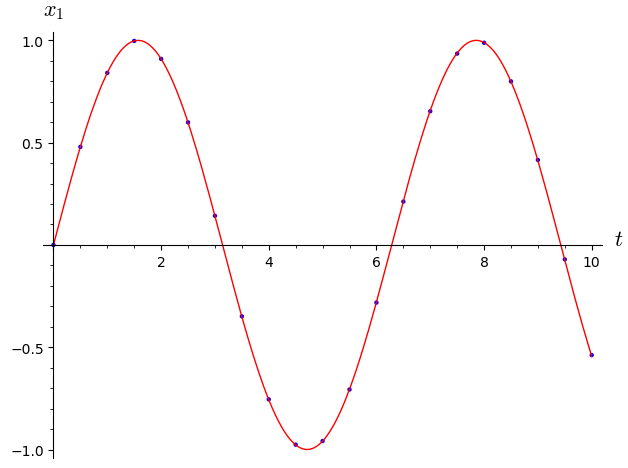

In [6]:
s1.plot(t,x1)+plot(sin,(0,10),color="red")

Поддерживается большинство опций функции стандартных функций point/line, кроме тех, к которым можно обратиться через метод show.

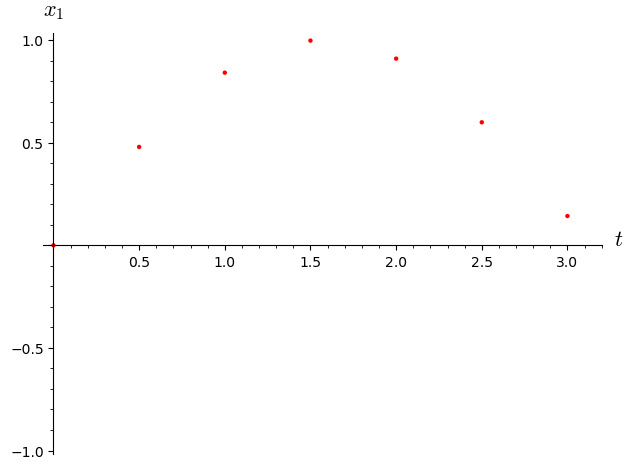

In [7]:
s1.plot(t,x1, color='red').show(xmin=0,xmax=pi)

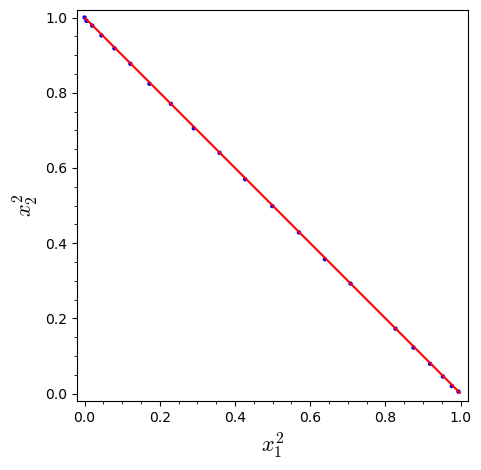

In [8]:
s1.plot(x1^2,x2^2)+implicit_plot(x1+x2-1,(x1,0,1),(x2,0,1), color="red")

Интерполяция: по формуле Тейлора или сплайнами

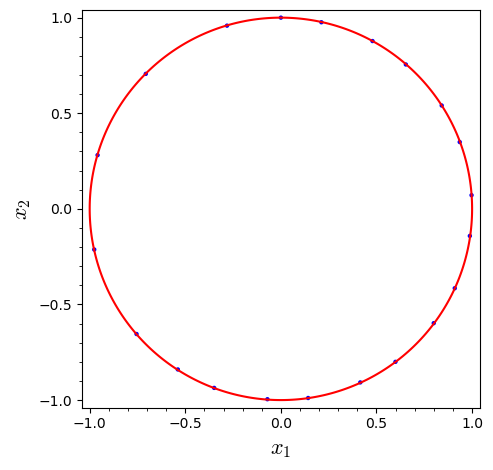

In [9]:
s1.plot(x1,x2)+implicit_plot(x1^2+x2^2-1,(x1,-1,1),(x2,-1,1), color="red")

In [10]:
s1.value(x1,9.12)

0.303582697696811

In [11]:
s1.value(x1,9.12)-sin(9.12)

0.00350132133172604

In [12]:
s1.spline(x1,9.12)

[[8.50000000000000, 0.799481795261599], [9.00000000000000, 0.415224374490619], [9.50000000000000, -0.0705084361319803], [10.0000000000000, -0.538894075624010]]

In [13]:
f=s1.spline(x1,9.12)
f(9.12)

0.30513034311361786

In [14]:
f(9.12)-sin(9.12)

0.00504896674853289

Отыскание нулей

In [15]:
s1.zeros(x1)

[3.1430180411731743, 6.286036263964258, 9.429057230259955]

In [16]:
[pi.n()*i for i in [1,2,3]]

[3.14159265358979, 6.28318530717959, 9.42477796076938]

## Оценки по Ричадсону

Пусть $u(t,x_1, \dots x_n)$ --- заданное символьное выражение и $t=a$ --- заданный момент времени. Пусть $b$ --- точное знаение $u$ в этот момент времени, а $b_h$ --- приближенное. Тогда 
$$
E=b_h - b = ch^r + O(h^{r+1}).
$$
Если порядок интеполяции по численному решению выше порядка аппроксимации разностной схемы, то $r$ равен порядку аппроксимации. 
Если известно два приближенных занчения, то из системы 
$$
b_{h_1} - b = ch_1^r, \quad b_{h_2} - b = ch_2^r
$$
можно найти ошибку по формуле
$$
E=ch_2^r= \frac{b_{h_2}-b_{h_1}}{1-\left(\frac{h_1}{h_2}\right)^r}
$$
См.: Baddour A., Malykh M.D. Richardson-Kalitkin method in abstract description // Discrete and Continuous Models and Applied Computational Science. - 2021. - Vol. 29. - N. 3. - P. 271-284. doi: [10.22363/2658-4670-2021-29-3-271-284](https://doi.org/10.22363/2658-4670-2021-29-3-271-284).

In [17]:
p1=erk(pr1,N=40)
p2=erk(pr1,N=91)
richardson(p1,p2,x1^2,9.1)

[0.101830233518793, 5.99027198942754e-6]

In [18]:
p2.value(x1^2,9.1)-sin(9.1)^2

6.46866475485786e-6

## Диаграмма Ричардсона
$$\ln E= r \ln h +a$$
График зависимости ошибки от шага в двойном логарифмическом масшатбе должен быть линейным. Это -- проверяемое условие применимости метода Ричардсона.  

In [19]:
L=[erk(pr1,N=2^n, field=RealField(40)) for n in range(15)]

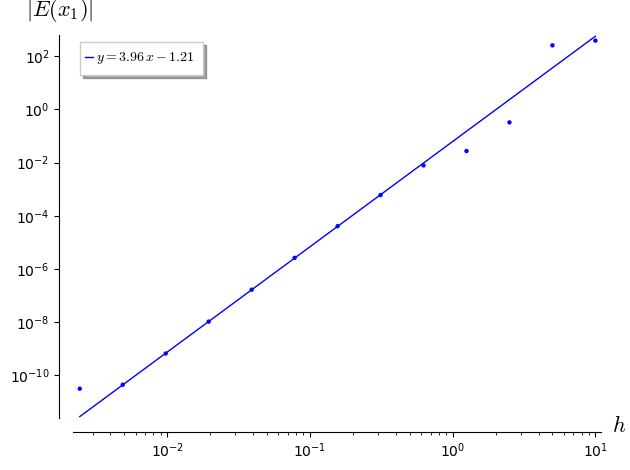

In [20]:
richardson_plot(L[:-1],x1,9.1, nmin=5, nmax=len(L)-3)

На диаграмме Ричардсона есть:
* участок, где $h$ велико и заметен вклад следующих членов ряда по степеням $h$, 
* линейный участок, где применим метод Ричадрсона
* участок, где $h$ мало, здесь мы вышли на ошибку округления. 

In [21]:
L2=[erk(pr1,N=2^n, field=RealField(20)) for n in range(15)]

/usr/lib64/python3.11/site-packages/sage/plot/graphics.py:2842: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  subplot.set_ylim([ymin, ymax])


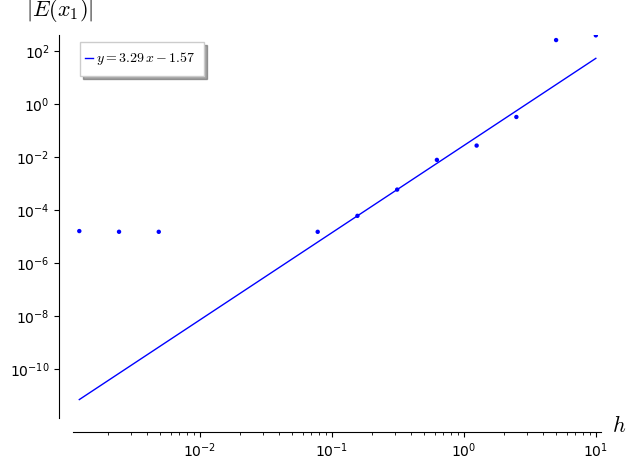

In [22]:
richardson_plot(L2,x1,9.1, nmin=5, nmax=7)

В особых случаях порядок может быть выше порядка аппроксимации:
$$
E=b_h - b = 0 h^r + c_1 h^{r+1} + O(h^{r+2})  
$$

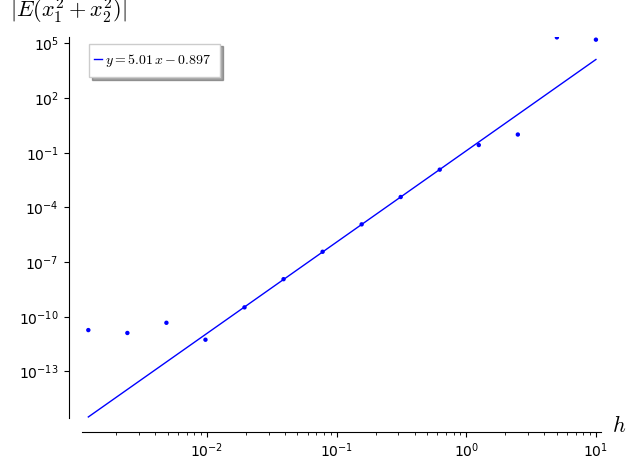

In [23]:
richardson_plot(L,x1^2+x2^2,9.1, nmin=4, nmax=len(L)-5)

In [24]:
richardson(L[-5],L[-6],x1^2+x2^2-1,pi.n(),delta=1)

[-5.7586158064e-12, -3.5544779485e-12]

Вопрос. Может ли случиться, что эфективный порядок $r$ имеет дробное значение? Что использовать лучше: 5 или 5.01?

Метод Ричадсона применим и к вычислению нулей.

In [25]:
L=[erk(pr1, N=2^n*10) for n in range(10)]

In [26]:
L[-1].zeros(x1)

[3.141592653590175, 6.28318530718035, 9.424777960770523]

In [27]:
[pi.n()*i for i in [1,2,3]]

[3.14159265358979, 6.28318530717959, 9.42477796076938]

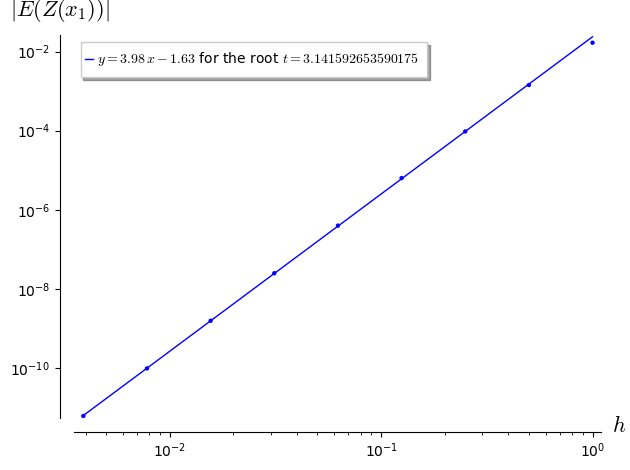

In [28]:
richardson_plot_zeros(L, x1, num=0, nmin=1)

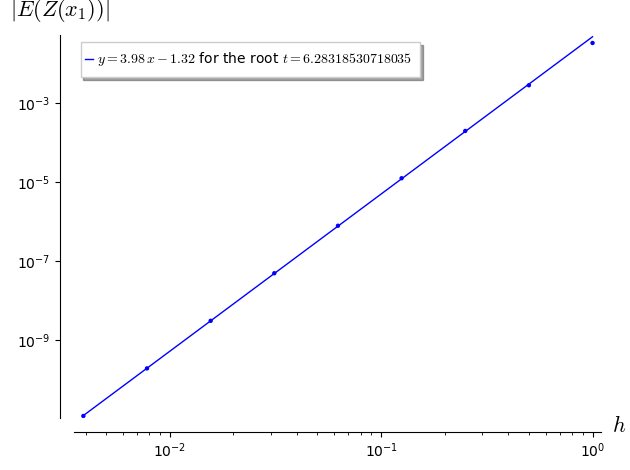

In [29]:
richardson_plot_zeros(L, x1, num=1, nmin=1)

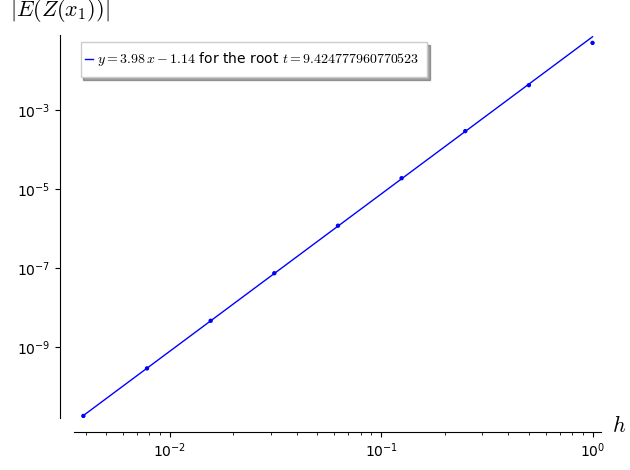

In [30]:
richardson_plot_zeros(L, x1, num=2, nmin=1)

In [31]:
richardson_zeros(L[-1],L[-2], x1)

[3.141592653590175, 3.80702876630797e-13]

In [32]:
L[-1].zeros(x1)[0]-RR(pi)

3.81916720471054e-13

## Явный метод Рунге-Кутты

### Пример работы с таблицой Бутчера 6-го порядка

Таблицы Бутчера для явного метода собраны на сайте [П. Стоуна](http://www.peterstone.name/Maplepgs/RKcoeff.html). 

In [33]:
butcher_list(6)

In [47]:
[B,C]=butcher_list(6)
B.description()

'http://www.peterstone.name/Maplepgs/Maple/nmthds/RKcoeff/Runge_Kutta_schemes/RK6/RKcoeff6d_1.pdf'

Выведем первую таблицу на печать

In [41]:
B.latex()

\begin{array}{c|ccccccc}
 &  &  &  &  &  &  & \\
\frac{1}{2} & \frac{1}{2} &  &  &  &  &  & \\
\frac{2}{3} & \frac{2}{9} & \frac{4}{9} &  &  &  &  & \\
\frac{1}{3} & \frac{7}{36} & \frac{2}{9} & -\frac{1}{12} &  &  &  & \\
\frac{5}{6} & -\frac{35}{144} & -\frac{55}{36} & \frac{35}{48} & \frac{15}{8} &  &  & \\
\frac{1}{6} & -\frac{1}{360} & -\frac{11}{36} & -\frac{1}{8} & \frac{1}{2} & \frac{1}{10} &  & \\
1 & -\frac{41}{260} & \frac{22}{13} & \frac{43}{156} & -\frac{118}{39} & \frac{32}{195} & \frac{80}{39} & \\
\hline
 & \frac{13}{200} &  & \frac{11}{40} & \frac{11}{40} & \frac{4}{25} & \frac{4}{25} & \frac{13}{200}
\end{array}


$$
\begin{array}{c|ccccccc}
 &  &  &  &  &  &  & \\
\frac{1}{2} & \frac{1}{2} &  &  &  &  &  & \\
\frac{2}{3} & \frac{2}{9} & \frac{4}{9} &  &  &  &  & \\
\frac{1}{3} & \frac{7}{36} & \frac{2}{9} & -\frac{1}{12} &  &  &  & \\
\frac{5}{6} & -\frac{35}{144} & -\frac{55}{36} & \frac{35}{48} & \frac{15}{8} &  &  & \\
\frac{1}{6} & -\frac{1}{360} & -\frac{11}{36} & -\frac{1}{8} & \frac{1}{2} & \frac{1}{10} &  & \\
1 & -\frac{41}{260} & \frac{22}{13} & \frac{43}{156} & -\frac{118}{39} & \frac{32}{195} & \frac{80}{39} & \\
\hline
 & \frac{13}{200} &  & \frac{11}{40} & \frac{11}{40} & \frac{4}{25} & \frac{4}{25} & \frac{13}{200}
\end{array}
$$

In [42]:
B.latex(field=RealField(11))

\begin{array}{c|ccccccc}
 &  &  &  &  &  &  & \\
0.500 & 0.500 &  &  &  &  &  & \\
0.667 & 0.222 & 0.444 &  &  &  &  & \\
0.333 & 0.194 & 0.222 & -0.0833 &  &  &  & \\
0.834 & -0.243 & -1.53 & 0.729 & 1.88 &  &  & \\
0.167 & -0.00278 & -0.306 & -0.125 & 0.500 & 0.100 &  & \\
1.00 & -0.158 & 1.69 & 0.276 & -3.03 & 0.164 & 2.05 & \\
\hline
 & 0.0650 &  & 0.275 & 0.275 & 0.160 & 0.160 & 0.0650
\end{array}


$$
\begin{array}{c|ccccccc}
 &  &  &  &  &  &  & \\
0.500 & 0.500 &  &  &  &  &  & \\
0.667 & 0.222 & 0.444 &  &  &  &  & \\
0.333 & 0.194 & 0.222 & -0.0833 &  &  &  & \\
0.834 & -0.243 & -1.53 & 0.729 & 1.88 &  &  & \\
0.167 & -0.00278 & -0.306 & -0.125 & 0.500 & 0.100 &  & \\
1.00 & -0.158 & 1.69 & 0.276 & -3.03 & 0.164 & 2.05 & \\
\hline
 & 0.0650 &  & 0.275 & 0.275 & 0.160 & 0.160 & 0.0650
\end{array}
$$

Вторая таблица

In [48]:
C.description()

'http://www.peterstone.name/Maplepgs/Maple/nmthds/RKcoeff/Runge_Kutta_schemes/RK6/RKcoeff6d_2.pdf'

In [43]:
C.latex()

\begin{array}{c|ccccccc}
 &  &  &  &  &  &  & \\
\frac{1}{6} & \frac{1}{6} &  &  &  &  &  & \\
\frac{1}{5} & \frac{2}{25} & \frac{3}{25} &  &  &  &  & \\
\frac{1}{3} & \frac{2}{27} & -\frac{1}{9} & \frac{10}{27} &  &  &  & \\
\frac{2}{3} & \frac{10}{27} & -\frac{2}{9} & -\frac{35}{54} & \frac{7}{6} &  &  & \\
\frac{3}{4} & -\frac{9}{256} & \frac{9}{64} & \frac{165}{448} &  & \frac{495}{1792} &  & \\
1 & \frac{4}{19} & -\frac{3}{19} & -\frac{305}{1463} & \frac{81}{95} & -\frac{90}{133} & \frac{1024}{1045} & \\
\hline
 & \frac{3}{40} &  & \frac{625}{3696} & \frac{27}{100} & \frac{27}{280} & \frac{256}{825} & \frac{19}{240}
\end{array}


$$
\begin{array}{c|ccccccc}
 &  &  &  &  &  &  & \\
\frac{1}{6} & \frac{1}{6} &  &  &  &  &  & \\
\frac{1}{5} & \frac{2}{25} & \frac{3}{25} &  &  &  &  & \\
\frac{1}{3} & \frac{2}{27} & -\frac{1}{9} & \frac{10}{27} &  &  &  & \\
\frac{2}{3} & \frac{10}{27} & -\frac{2}{9} & -\frac{35}{54} & \frac{7}{6} &  &  & \\
\frac{3}{4} & -\frac{9}{256} & \frac{9}{64} & \frac{165}{448} &  & \frac{495}{1792} &  & \\
1 & \frac{4}{19} & -\frac{3}{19} & -\frac{305}{1463} & \frac{81}{95} & -\frac{90}{133} & \frac{1024}{1045} & \\
\hline
 & \frac{3}{40} &  & \frac{625}{3696} & \frac{27}{100} & \frac{27}{280} & \frac{256}{825} & \frac{19}{240}
\end{array}
$$

In [49]:
s1=erk(pr1,N=10)
s2=erk(pr1,N=10, tableau=B)
s3=erk(pr1,N=10, tableau=C)

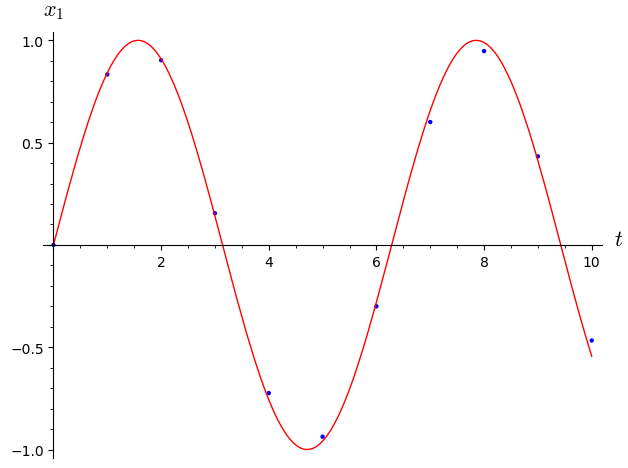

In [50]:
s1.plot(t,x1)+plot(sin,(0,10),color="red")

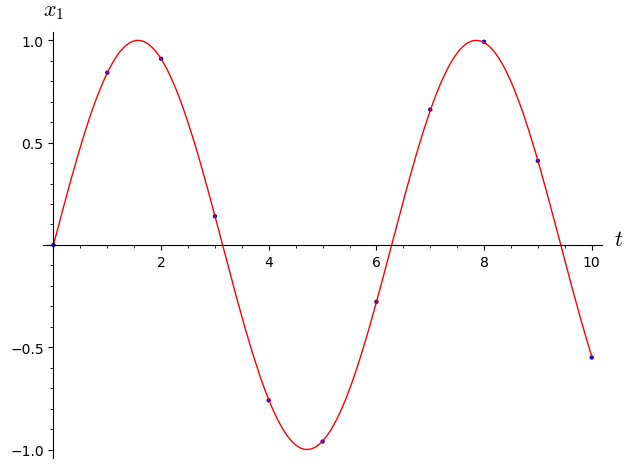

In [51]:
s2.plot(t,x1)+plot(sin,(0,10),color="red")

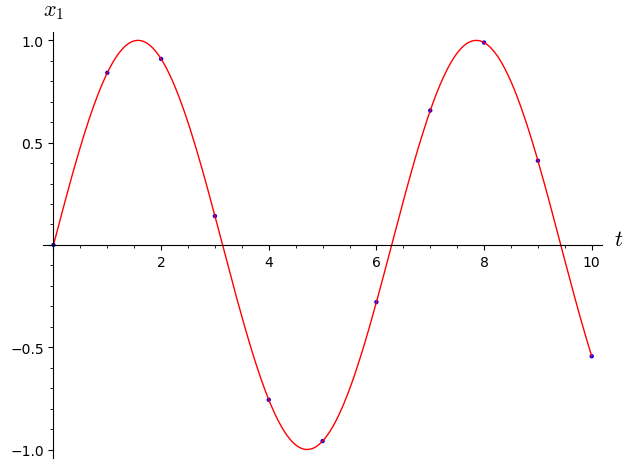

In [52]:
s3.plot(t,x1)+plot(sin,(0,10),color="red")

In [53]:
s2.list()

[[0, 0, 1],
 [1.00000000000000, 0.842129629629630, 0.540277777777778],
 [2.00000000000000, 0.909967849794239, -0.417282235939643],
 [3.00000000000000, 0.140229672933178, -0.991759207461706],
 [4.00000000000000, -0.759426837990659, -0.653917023228362],
 [5.00000000000000, -0.960984344994208, 0.286239005646995],
 [6.00000000000000, -0.278148138581646, 0.963921964414124],
 [7.00000000000000, 0.661469988678014, 0.755022405810786],
 [8.00000000000000, 0.993204274517158, -0.149121648992648],
 [9.00000000000000, 0.411026439279582, -0.916973860982006],
 [10.0000000000000, -0.550142406706943, -0.841558142970167]]

In [54]:
s3.list()

[[0, 0, 1],
 [1.00000000000000, 0.841481481481481, 0.540277777777778],
 [2.00000000000000, 0.909267489711934, -0.416191006515775],
 [3.00000000000000, 0.141039994004979, -0.989990506437186],
 [4.00000000000000, -0.756857903470564, -0.653552413942428],
 [5.00000000000000, -0.958865759690697, 0.283782064017261],
 [6.00000000000000, -0.279256510185773, 0.960188922926831],
 [7.00000000000000, 0.657105110613431, 0.753757919430219],
 [8.00000000000000, 0.989292619649185, -0.145703128275882],
 [9.00000000000000, 0.411886333877942, -0.911191581561256],
 [10.0000000000000, -0.544217808801010, -0.838891285249321]]

Оценка порядка по Ричардсону

In [55]:
@parallel
def foo(n):
    return erk(pr1,N=2^n)
L=foo([n for n in range(15)])
L1=[sol for (n,sol) in L]

In [56]:
@parallel
def foo(n):
    return erk(pr1,N=2^n, tableau=B)
L=foo([n for n in range(15)])
L2=[sol for (n,sol) in L]

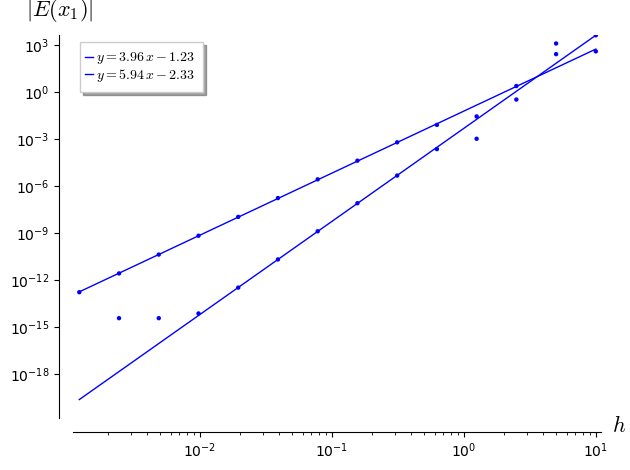

In [57]:
richardson_plot(L1,x1,9.1, nmin=4) +\
richardson_plot(L2,x1,9.1, nmin=5, nmax=10)

Из-за высокого порядка мы быстро выходим на ошибку округления. Ее можно убрать, используя опцию field. Только и 9.1 нужно указывать как элемент поля RealField(300).

In [47]:
@parallel
def foo(n):
    return erk(pr1,N=2^n, tableau=B, field=RealField(300))
L=foo([n for n in range(15)])
L3=[sol for (n,sol) in L]

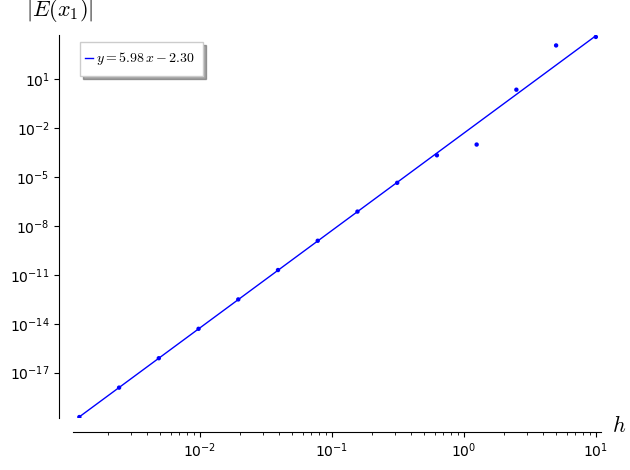

In [48]:
richardson_plot(L3,x1,RealField(300)(9.1), nmin=5)

### Констурирование явных таблиц Бутчера

Задача отыскания таблиц Бутчера относится к компьютерной алгебре и состоит из двух шагов:
* составление системы уравнений на элементы таблицы
* решение этой системы по методу Бухбергера

Первый шаг мы упростили, рассматривая ОДУ 1-го порядка (скаляризация задачи). 

Таблица с s стадиями имеет порядок n, если ее коэффциенты удовлетворяют системе уравнений, которые возвращает функция butcher_eqs(n,s), опция implicit указывает на то, является ли таблица явной или нет. По умолчанию является. 

См.: Ying Y. The symbolic problems associated with Runge-Kutta methods and their solving in Sage // Discrete and Continuous Models and Applied Computational Science. - 2019. - Vol. 27. - N. 1. - P. 33-41. doi: [10.22363/2658-4670-2019-27-1-33-41](https://doi.org/10.22363/2658-4670-2019-27-1-33-41)

#### 2-порядок

В нашу коллекцию входит лишь одна таблица 2-го порядка.

In [59]:
butcher_list(2)

In [62]:
butcher_list(2)[0].description()

'Standard RK method. Hairer, p. 140'

In [60]:
butcher_list(2)[0].latex()

\begin{array}{c|cc}
 &  & \\
\frac{1}{2} & \frac{1}{2} & \\
\hline
 &  & 1
\end{array}


$$\begin{array}{c|cc}
 &  & \\
\frac{1}{2} & \frac{1}{2} & \\
\hline
 &  & 1
\end{array}$$

Функция butcher_eqs(order,stages) возвращает систему уравнений на коэффциенты Бутчера. 

In [63]:
butcher_eqs(2,2, implicit=False)

[-b0 - b1 + 1, -2*a10*b1 + 1]

Два уравнения на 3 неизвестные. Таблиц, имеющих 2 стадии и порядок 2, бесконечно много. Как распорядиться этим произволом?

In [64]:
butcher_eqs(3,2, implicit=False)

[-b0 - b1 + 1, -2*a10*b1 + 1, 1, -3*a10^2*b1 + 1]

Таблиц, имеющих 2 стадии и порядок 3, нет. 

In [65]:
a10=1
b1 = 1/2/a10
b0=1-b1
B=Butcher_tableau(2,[[[0,0],[a10,0]], [b0,b1]])

In [66]:
B.latex(field=AA)

\begin{array}{c|cc}
 &  & \\
1 & 1 & \\
\hline
 & \frac{1}{2} & \frac{1}{2}
\end{array}


$$\begin{array}{c|cc}
 &  & \\
1 & 1 & \\
\hline
 & \frac{1}{2} & \frac{1}{2}
\end{array}$$

In [67]:
s2=erk(pr1,N=40, tableau=B)

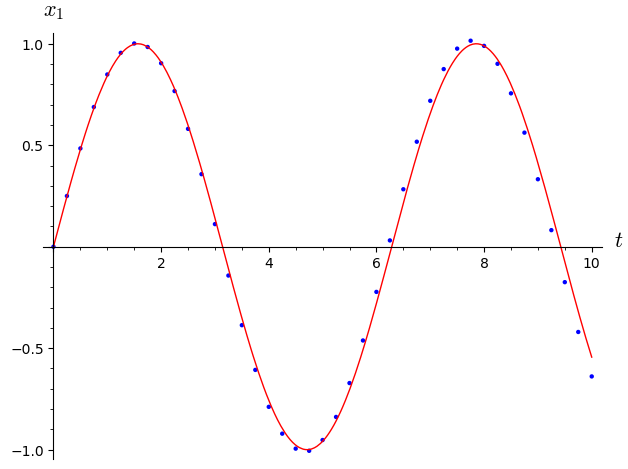

In [68]:
s2.plot(t,x1)+plot(sin,(0,10), color='red')

In [69]:
L=[erk(pr1,N=2^n, tableau=B) for n in range(12)]

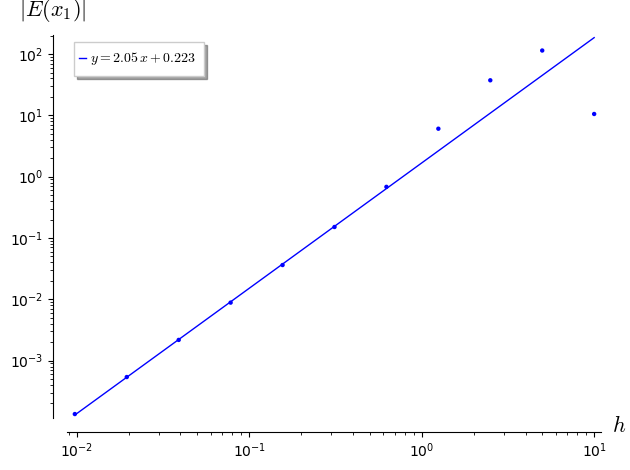

In [70]:
richardson_plot(L,x1,10, nmin=4)

In [71]:
a10=i
b1 = 1/2/a10
b0=1-b1
Bi=Butcher_tableau(2,[[[0,0],[a10,0]], [b0,b1]])

In [72]:
Bi.latex(field=QQbar)

\begin{array}{c|cc}
 &  & \\
i & i & \\
\hline
 & \frac{1}{2} i + 1 & -\frac{1}{2} i
\end{array}


$$\begin{array}{c|cc}
 &  & \\
i & i & \\
\hline
 & \frac{1}{2} i + 1 & -\frac{1}{2} i
\end{array}$$

In [73]:
Li=[erk(pr1,N=2^n, tableau=Bi, field=CC) for n in range(12)]

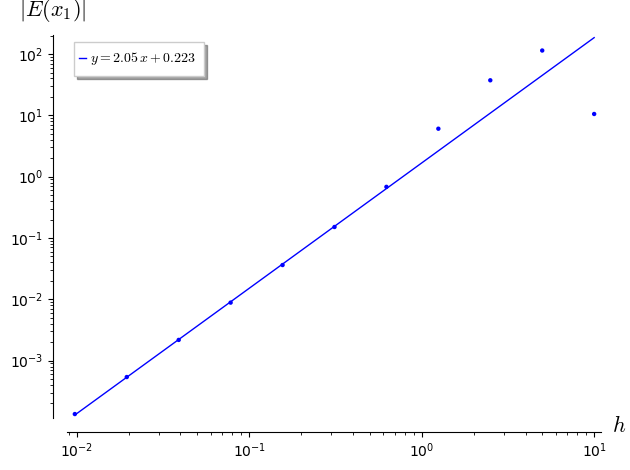

In [74]:
richardson_plot(Li,x1,10, nmin=4)

Мнимая добавка проявляется только в нелинейных задачах. Мера влияния нелинейности на  приближенное решение. 

In [75]:
var("p,q,r,t")
k=1/2
pr2=Initial_problem([p,q,r], [q*r,-p*r,-k^2*p*q], [0,1,1], 10)

In [76]:
erk(pr2, N=200, tableau=B, field=CC).list()[-1]

[10.0000000000000, 0.110646443410733, -0.993981036268121, 0.998488526720930]

In [77]:
erk(pr2, N=200, tableau=Bi, field=CC).list()[-1]

[10.0000000000000,
 0.111457845209401 - 0.000811190390574542*I,
 -0.993887908064835 - 0.0000938446416060465*I,
 0.998463284419687 + 0.0000254707261498003*I]

In [78]:
jacobi('sn',10.0, k^2)

0.114190123460750

#### Схема Шанкса

В теории скаляризация может приводить к ошибкам, которые исправляет метод Ричардсона. Описан всего один такой пример --- схема Шанкса. 

Ссылки:
* Shanks, E.B. Solutions of Differential Equations by Evaluations of Functions. Math. Comput. 1966, 20, 21–38. 
* Sarafyan, D.; Outlaw, C.; Derr, L. An investigation of Runge-Kutta processes, and equivalence of scalar and vector cases. J. Math. Anal. Appl. 1984, 104, 568–588
* Kadrov, V.; Malykh, M.; Zorin, A. On the Selection of Weights for Difference Schemes to Approximate Systems of Differential Equations. Mathematics 2024, 12, 2287. https://doi.org/10.3390/math12142287

In [79]:
B=butcher_list(5)[-1]

In [80]:
B.description()

'Shanks'

In [81]:
B.order()

5

In [82]:
B.latex(field=QQ)

\begin{array}{c|ccccccc}
 &  &  &  &  &  &  & \\
\frac{1}{192} & \frac{1}{192} &  &  &  &  &  & \\
\frac{1}{6} & -\frac{5}{2} & \frac{8}{3} &  &  &  &  & \\
\frac{1}{2} & \frac{157}{6} & -\frac{2536}{93} & \frac{149}{93} &  &  &  & \\
1 & -645 & \frac{20896}{31} & -\frac{1025}{31} & 5 &  &  & \\
\frac{5}{6} & -\frac{15155}{162} & \frac{245480}{2511} & -\frac{11368}{2511} & \frac{10}{9} & \frac{1}{27} &  & \\
1 & \frac{14747}{42} & -\frac{34112}{93} & \frac{47983}{2604} & -\frac{5}{2} & -\frac{3}{14} & \frac{27}{28} & \\
\hline
 & \frac{7}{150} &  & \frac{27}{100} & \frac{11}{30} &  & \frac{27}{100} & \frac{7}{150}
\end{array}


$$
\begin{array}{c|ccccccc}
 &  &  &  &  &  &  & \\
\frac{1}{192} & \frac{1}{192} &  &  &  &  &  & \\
\frac{1}{6} & -\frac{5}{2} & \frac{8}{3} &  &  &  &  & \\
\frac{1}{2} & \frac{157}{6} & -\frac{2536}{93} & \frac{149}{93} &  &  &  & \\
1 & -645 & \frac{20896}{31} & -\frac{1025}{31} & 5 &  &  & \\
\frac{5}{6} & -\frac{15155}{162} & \frac{245480}{2511} & -\frac{11368}{2511} & \frac{10}{9} & \frac{1}{27} &  & \\
1 & \frac{14747}{42} & -\frac{34112}{93} & \frac{47983}{2604} & -\frac{5}{2} & -\frac{3}{14} & \frac{27}{28} & \\
\hline
 & \frac{7}{150} &  & \frac{27}{100} & \frac{11}{30} &  & \frac{27}{100} & \frac{7}{150}
\end{array}
$$

Для линейного осциллятора порядок равен 6

In [83]:
@parallel
def foo(n):
    return erk(pr1,N=10*2^n, tableau=B)
L=foo([n for n in range(10)])
G=[sol for (n,sol) in L]

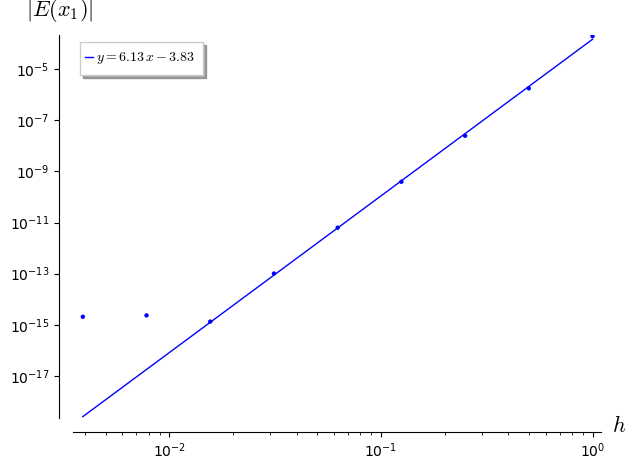

In [84]:
richardson_plot(G ,x1,10, nmin = 0, nmax = 6)

Для осциллятора Якоби порядок равен 5

In [85]:
var("p,q,r,t")
k=1/2
pr2=Initial_problem([p,q,r], [q*r,-p*r,-k^2*p*q], [0,1,1], 10)
@parallel
def foo(n):
    return erk(pr2,N=10*2^n, tableau=B, field=RealField(100))
L=foo([n for n in range(10)])
G=[sol for (n,sol) in L]

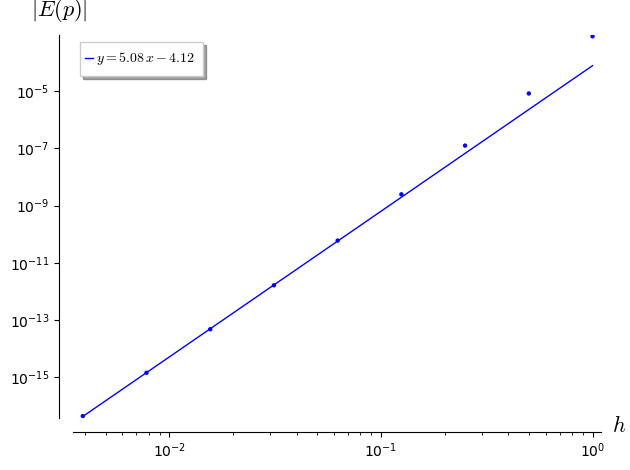

In [86]:
richardson_plot(G,p, 10, nmin=4, nmax = oo)

### Забавный пример: система Лоренца

In [2]:
var('x,y,z,t')
sigma=10
r=28
b=8/3
T=30
pr=Initial_problem([x,y,z],[sigma*(y - x), x* (r - z) - y, x*y - b*z],\
                   [1,1,1],T)
pr.latex()

\left \{ \begin{aligned} &
\frac{d}{dt} x = -10 \, x + 10 \, y , \quad \frac{d}{dt} y = -x {\left(z - 28\right)} - y , \quad  \frac{d}{dt} z = x y - \frac{8}{3} \, z , \\ &
x (0)= 1 , \quad y (0)= 1 , \quad z (0)= 1
\end{aligned} \right. 


$$
\left \{ \begin{aligned} &
\frac{d}{dt} x = -10 \, x + 10 \, y , \quad \frac{d}{dt} y = -x {\left(z - 28\right)} - y , \quad  \frac{d}{dt} z = x y - \frac{8}{3} \, z , \\ &
x (0)= 1 , \quad y (0)= 1 , \quad z (0)= 1
\end{aligned} \right. 
$$

In [3]:
sol=erk(pr,N=4000)
sol2=erk(pr,N=8000)

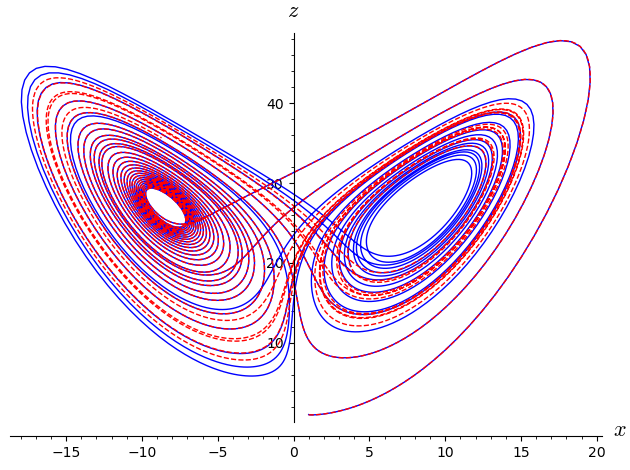

In [4]:
sol.plot(x,z)+sol2.plot(x,z, color='red', linestyle='--')

In [5]:
sol.plot3d(x,y,z)+sol2.plot3d(x,y,z, color='red', linestyle='--')

Graphics3d Object

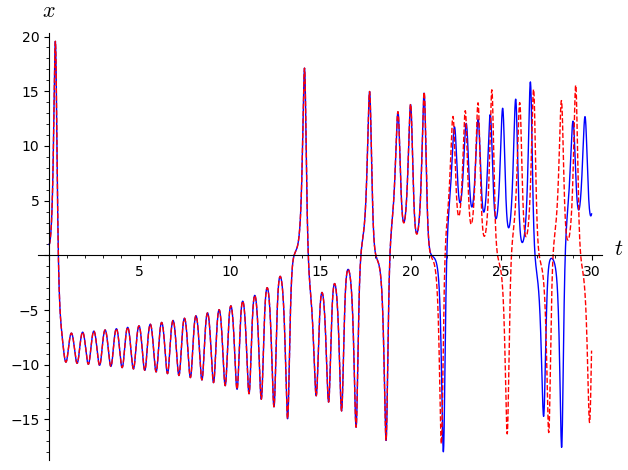

In [6]:
sol.plot(t,x)+sol2.plot(t,x, color='red', linestyle='--')

До $t=21$ все было хорошо, а потом внезапно что-то случилось. Ричардсон сразу указывает на проблемы.

In [7]:
@parallel
def foo(n):
    return erk(pr,N=2^n*1000)
L=foo([n for n in range(6)])
G=[sol for (n,sol) in L]

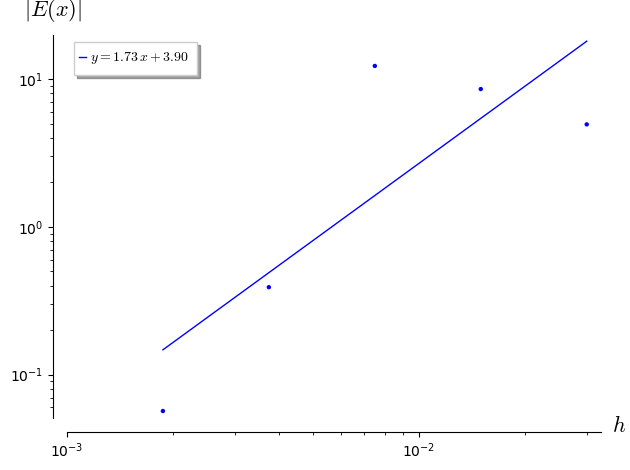

In [8]:
richardson_plot(G,x,25)

При малых $t$  точки ложаться почти на прямую, но наклон не правильный. 

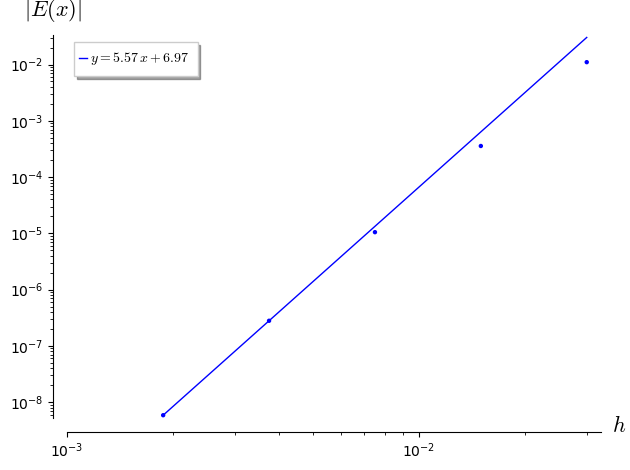

In [12]:
richardson_plot(G,x,1, nmin=3)

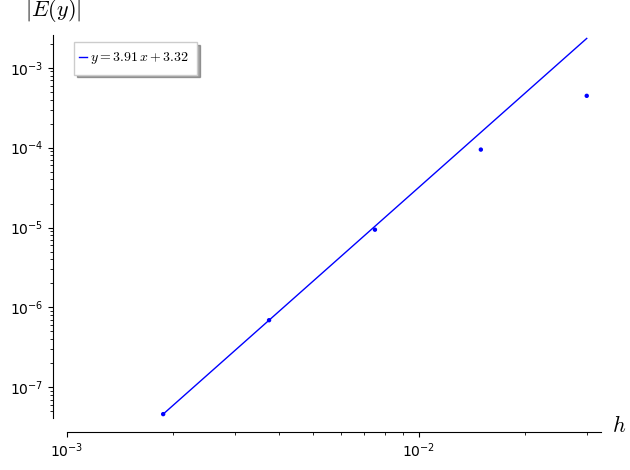

In [13]:
richardson_plot(G,y,1, nmin=3)

Схема 14-го поррядка улучшает, но эффект скачка становится даже резче. 

In [11]:
B=butcher_list(14)[0]
sol3=erk(pr,N=1000, tableau=B)
sol4=erk(pr,N=2000, tableau=B)

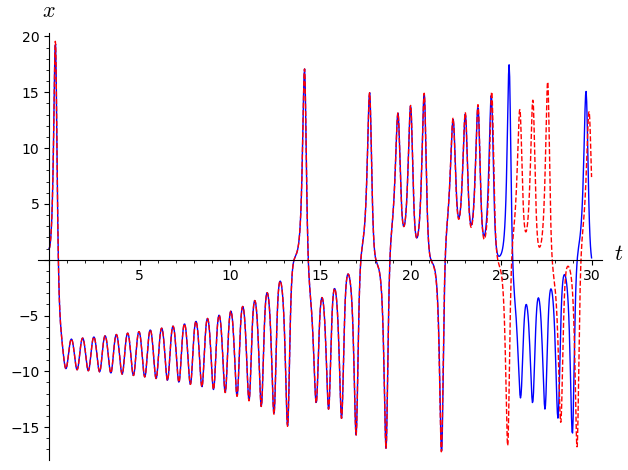

In [12]:
sol3.plot(t,x)+sol4.plot(t,x, color='red', linestyle='--')

## Аналитические методы интегрирования

Мозес: если мы умеем считать интегралы, то мы умеем и интегрировать ОДУ. Solder, 1960. 

Рассмотрим автономную систему
$$
\frac{dx}{dt}=q(x,y), \quad \frac{dy}{dt}=-p(x,y).
$$
Нас интересуют аналитические методы:
$$
pdx+qdy=0 \to u(x,y)=c.
$$

### ОДУ в полных дифференциалах

1-форма
$$
p(x,y)dx+ q(x,y)dy
$$
называется точной, если существует такая функция $u$, что
$$
p dx+ q dy=du,
$$
при этом $u$ называют потенциалом формы $pdx+qdy$. 

In [17]:
var("x,y,dx,dy")
y*dx+x*dy

dy*x + dx*y

In [18]:
def coef(w,x,y):
    dx=SR('d'+str(x))
    dy=SR('d'+str(y))
    p = diff(w,dx) 
    q = diff(w,dy)
    return [p,q]

In [19]:
coef(y*dx+x^2*y*dy,x,y)

[y, x^2*y]

Теорема. Форма является точной тогда и только тогда, когда
$$
\frac{\partial p}{\partial y} = \frac{\partial q}{\partial x}.
$$

In [20]:
def is_exact(w,x,y):
    [p,q]=coef(w,x,y)
    if diff(p,y)==diff(q,x):
        return True
    else:
        return False

In [21]:
v=x/y
is_exact(diff(v,x)*dx+diff(v,y)*dy,x,y)

True

In [22]:
v=sin(x*y)
is_exact(diff(v,x)*dx+diff(v,y)*dy,x,y)

True

Если форма является точной, то ее потенциал можно найти по формуле
$$
u(x,y)=\int pdx+qdy,
$$
где криволинейной интеграл берется по любому пути, соединяющему некоторую фиксированную точку $O$ и точку с координатами $(x,y)$.

Отрезок прямой, соединяющий $O=(0,0)$ и $(X,Y)$, можно представить параметрически как
$$
x=Xt, \quad y=Yt \quad t\in [0,1].
$$
Поэтому 
$$
u(X,Y)=\int \limits_{t=0}^1 \left(p(Xt,Yt)X+q(Xt,Yt)Y\right) dt
$$
Иными словами,
$$
u(x,y)=\int pdx+qdy= \int \limits_{t=0}^1 \left(p(xt,yt)x+q(xt,yt)y\right) dt
$$

In [23]:
def pot(w,x,y):
    [p,q]=coef(w,x,y)
    if is_exact(w,x,y):
        var("t")
        S=[x==x*t, y==y*t]
        return integral(p.subs(S)*x+q.subs(S)*y,(t,0,1))
    else:
        return False

In [24]:
pot(y*dx+x*dy,x,y)

x*y

In [25]:
v=1/(1+x^2+y^2)
pot(diff(v,x)*dx+diff(v,y)*dy,x,y)

1/(x^2 + y^2 + 1) - 1

In [26]:
v=x/(1+x^2+y^2)
pot(diff(v,x)*dx+diff(v,y)*dy,x,y)

ValueError: Computation failed since Maxima requested additional constraints; using the 'assume' command before evaluation *may* help (example of legal syntax is 'assume((-4*y^2)-4*x^2>0)', see `assume?` for more details)
Is (-4*y^2)-4*x^2 negative or zero?

Чего хочет Maxima? Корректно наша функция работает в тех случаях, когда $p,q$ -- многочлены.

Если 
$$
p dx+ q dy=du,
$$
то решением диффренциального уравнения 
$$
pdx+qdy=0
$$
будет
$$
u(x,y)=\mbox{const}.
$$
При этом само дифференциальное уранвение называют полным (exact) или уравнением в полных дифференциалах. 

#### Пример № 186 из задачника Филлипова:

In [27]:
p=2*x*y
q=x^2-y^2
w=p*dx+q*dy
u=pot(w,x,y)
u

x^2*y - 1/3*y^3

In [28]:
x0=1
y0=1
T=1
pr=Initial_problem([x,y],[q,-p],[x0,y0],T)
pr.latex()

\left \{ \begin{aligned} &
\frac{d}{dt} x = x^{2} - y^{2} , \quad  \frac{d}{dt} y = -2 \, x y , \\ &
x (0)= 1 , \quad y (0)= 1
\end{aligned} \right. 


In [29]:
sol=erk(pr,N=100)

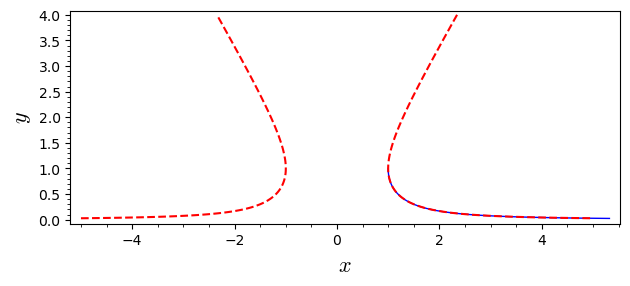

In [30]:
sol.plot(x,y)+\
implicit_plot(u==u.subs([x==x0,y==y0]),(x,-5,5),(y,0,4), color='red', linestyle='--')

#### № 188 из задачника Филлипова 
Найдите решение начальной задачи 
$$
e^{-y}dx-(2y+xe^{-y})dy=0,  \quad y(1)=2.
$$
Нарисуйте его график. 

### Отыскание интегрирующего множителя 

Интегрирующим множителем формы $pdx+qdy$ называют такую функцию $\mu$, что форма 
$$
\mu\cdot (pdx+qdy)
$$
является точной. В этом сулчае сущесвтует потенциал $u$:
$$
\mu\cdot (pdx+qdy)=du.
$$

Условия точности формы дают уравнения для отыскания $\mu$:
$$
\frac{\partial \mu p}{\partial y} - \frac{\partial \mu q}{\partial x}=0.
$$
#### Множитель вида $\mu(x)$

Составим уравнение для множителя в этом случае

In [53]:
var("x,y")
p=function('p')(x,y)
q=function('q')(x,y)
mu=function('mu')(x)
diff(mu*p,y)-diff(mu*q,x)

-q(x, y)*diff(mu(x), x) + mu(x)*diff(p(x, y), y) - mu(x)*diff(q(x, y), x)

Сделаем замену
$$
\mu = e^{r(x)}
$$

In [55]:
r=function('r')(x)
mu=e^r
(diff(mu*p,y)-diff(mu*q,x)).factor()

-(q(x, y)*diff(r(x), x) - diff(p(x, y), y) + diff(q(x, y), x))*e^r(x)

Таким образом,
$$
\frac{dr}{dx}= \frac{1}{q} \left(\frac{\partial p}{\partial y} - \frac{\partial q}{\partial x}\right)
$$

Теорема. Множитель вида $\mu(x)$ существует тогда и только тогда, когда 
$$
\frac{1}{q} \left(\frac{\partial p}{\partial y} - \frac{\partial q}{\partial x}\right)
$$
не зависит от $y$. При этом
$$
\mu = \exp \int  \left(\frac{\partial p}{\partial y} - \frac{\partial q}{\partial x}\right) \frac{dx}{q}.
$$

In [31]:
def integrating_factor(w,x,y):
    [p,q]=coef(w,x,y)
    h=(diff(p,y)-diff(q,x))/q
    if diff(h,y)==0:
        return exp(integral(h,x))
    else:
        False

In [57]:
v=(x^2+y^2)*e^(x)
w=((diff(v,x)*dx+diff(v,y)*dy)/e^(x)).expand()
w

dx*x^2 + dx*y^2 + 2*dx*x + 2*dy*y

In [58]:
integrating_factor(w,x,y)

e^x

ЛОДУ 
$$
y'=a(x)y+b(x)
$$
всегда имеет множитель вида $\mu(x)$. 

In [59]:
a=function('a')(x)
b=function('b')(x)
w=dy-(a*y+b)*dx

In [60]:
integrating_factor(w,x,y)

// Giac share root-directory:/usr/share/giac/
// Giac share root-directory:/usr/share/giac/
Added 0 synonyms


e^(-integrate(a(x), x))

Этих алгоритмов достаточно для решения подавляющего большинства задач из учебников. Обычно проблема связана с ошибками в применении формулы
$$
u(x,y)=\int pdx+qdy= \int \limits_{t=0}^1 \left(p(xt,yt)x+q(xt,yt)y\right) dt
$$

### Однородные дифференциальные уравнения

Уравнение вида
$$
\frac{dy}{dx}=\frac{y}{x}F(x^ny)
$$
называется обобщенным однородным уравнением. Оно интегрируется подстановкой
$$
z=x^ny.
$$

In [62]:
var("x,z,n")
y=function('y')(x)
F=function('F')(z)
ode=diff(y,x)==y/x*F.subs(z==x^n*y)
ode

diff(y(x), x) == F(x^n*y(x))*y(x)/x

In [63]:
(diff(x^n*y,x).subs(ode).full_simplify()).subs(y==z/x^n).full_simplify()

(n*z + z*F(z))/x

Ответ:
$$
\frac{dz}{dx}=\frac{(n+F(z))z}{x}
$$

#### Камке, I:293:
$$
x(y^2 - 3x)dy + (2y^3 - 5xy)dx = 0
$$
Найдем $F$

In [76]:
var("x,y,z,dx,dy")
w=x*(y^2 - 3*x)*dy + (2*y^3 - 5*x*y)*dx 
[p,q]=coef(w,x,y)
F=-p/q/(y/x)
F.factor()

-(2*y^2 - 5*x)/(y^2 - 3*x)

Чтобы найти $n$, нужно заметить, что при этом значении $F(x,y)$ и $x^n y$ функционально зависимы. Поэтому их определитель Якоби равен нулю: 

In [77]:
jacobian([F,x^n*y],[x,y]).det().factor()

-(2*n + 1)*x^n*y^2/(y^2 - 3*x)^2

In [78]:
solve(jacobian([F,x^n*y],[x,y]).det(),n)

[n == (-1/2)]

In [79]:
nn=-1/2
FF=F.subs(y==z/x^nn).full_simplify()
FF

-(2*z^2 - 5)/(z^2 - 3)

Теперь интеграл  можно найти по формуле
$$
\int \frac{dz}{(n+F(z))z}= \ln x + C.
$$

In [80]:
integral(1/(nn+FF)/z,z)-ln(x)

2/65*log(5*z^2 - 13) - 3/13*log(z^2) - log(x)

In [81]:
u=integral(1/(nn+FF)/z,z).subs(z=x^nn*y)-ln(x)
u

-log(x) + 2/65*log(5*y^2/x - 13) - 3/13*log(y^2/x)

Таким образом, интеграл
$$
u(x,y)=Const.
$$
Хорошо видно, что 
$$
u = \ln v,
$$
где $v$ -- тоже интеграл. Найдем $v$:

In [82]:
v=exp(integral(1/(nn+FF)/z,z).subs(z=x^nn*y)-ln(x)).canonicalize_radical()
v

(5*y^2 - 13*x)^(2/65)/(x^(4/5)*y^(6/13))

Ответ:
$$
(5y^2 - 13x)^{2/65}=C x^{4/5}y^{6/13}
$$
Замечание. Здесь вместо 'full_simplify' испоьзуется 'canonicalize_radical'.

In [94]:
w=v^(65/2)
w

(5*y^2 - 13*x)/(x^26*y^15)

In [84]:
x0=1
y0=1
T=1
pr=Initial_problem([x,y],[q,-p],[x0,y0],T)
pr.latex()

\left \{ \begin{aligned} &
\frac{d}{dt} x = {\left(y^{2} - 3 \, x\right)} x , \quad  \frac{d}{dt} y = -2 \, y^{3} + 5 \, x y , \\ &
x (0)= 1 , \quad y (0)= 1
\end{aligned} \right. 


$$
\left \{ \begin{aligned} &
\frac{d}{dt} x = {\left(y^{2} - 3 \, x\right)} x , \quad  \frac{d}{dt} y = -2 \, y^{3} + 5 \, x y , \\ &
x (0)= 1 , \quad y (0)= 1
\end{aligned} \right. 
$$

In [85]:
sol=erk(pr,N=100)

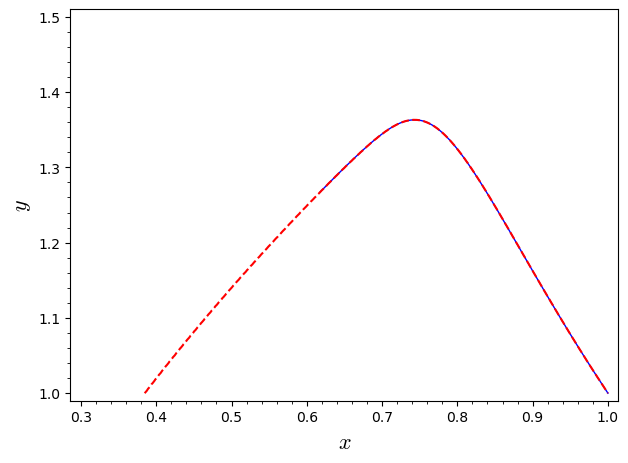

In [95]:
sol.plot(x,y)+\
implicit_plot(w==w.subs([x==x0,y==y0]),(x,0.3,1),(y,1,1.5), color='red', linestyle='--')

Напишите функцию hdesolve(ode, variables). На входе: однородное оду и список переменных, на выходе -- интеграл.

#### Теория Лиувилля

Теорема Зингера, 1990. Если 
$$
pdx+qdy, \quad p,q \in \mathbb{C}(x,y)
$$
допускает интегрирующий множитель в элементарных функциях, то 
$$
\mu = \exp \int Pdx+Qdy, \quad P,Q \in \mathbb{C}(x,y)
$$

Идея доказательства: интеграл определен с точностью до аддитивной константы и поэтому в структурной теоермы стоят логарифмы, а множитель --- с точностью до мультипликативной, поэтому появляется экспонента. 

### Групповой анализ

Чеб-Терраб, 2000-е годы

Вопрос. Какое из перечисленных ниже уравнений не интегрируется элементарными методами?
$$
\frac{dy}{dx}=F(x+y), \quad \frac{dy}{dx}=F(x-y)
$$
$$
\frac{dy}{dx}=F(x\cdot y), \quad \frac{dy}{dx}=F(x/y)
$$

Софус Ли: в трех случаях из 4-х интегральные кривые не подобны друг другу. 

Пример. 
$$
\frac{dy}{dx}=\sin(x \circ y)
$$

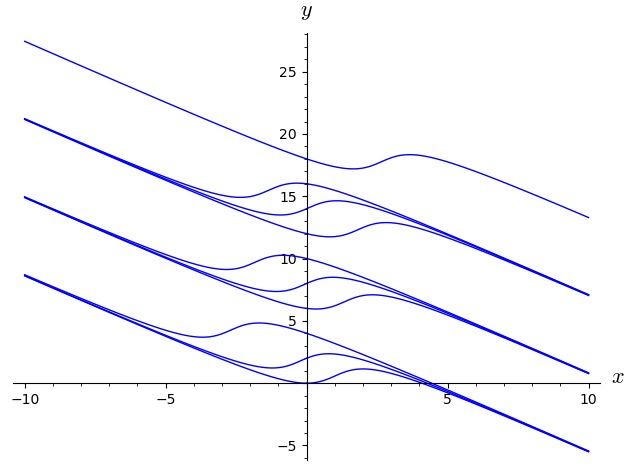

In [6]:
var('x,y,t')
sum([erk(Initial_problem([x,y],[1,sin(x+y)],[0,2*n],10),N=100).plot(x,y) for n in range(10)])+\
sum([erk(Initial_problem([x,y],[-1,-sin(x+y)],[0,2*n],10),N=100).plot(x,y) for n in range(10)])

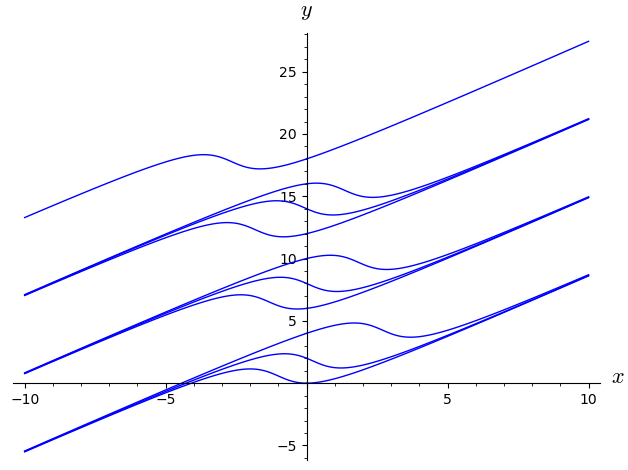

In [7]:
var('x,y,t')
sum([erk(Initial_problem([x,y],[1,sin(x-y)],[0,2*n],10),N=100).plot(x,y) for n in range(10)])+\
sum([erk(Initial_problem([x,y],[-1,-sin(x-y)],[0,2*n],10),N=100).plot(x,y) for n in range(10)])

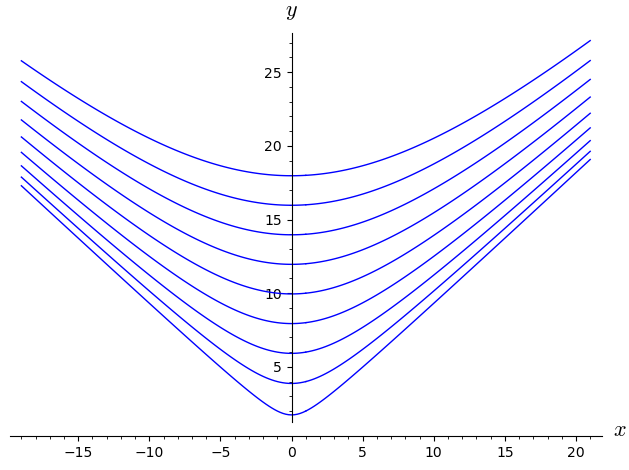

In [15]:
var('x,y,t')
sum([erk(Initial_problem([x,y],[1,sin(x/y)],[1,2*n],20),N=100).plot(x,y) for n in range(1,10)])+\
sum([erk(Initial_problem([x,y],[-1,-sin(x/y)],[1,2*n],20),N=100).plot(x,y) for n in range(1,10)])

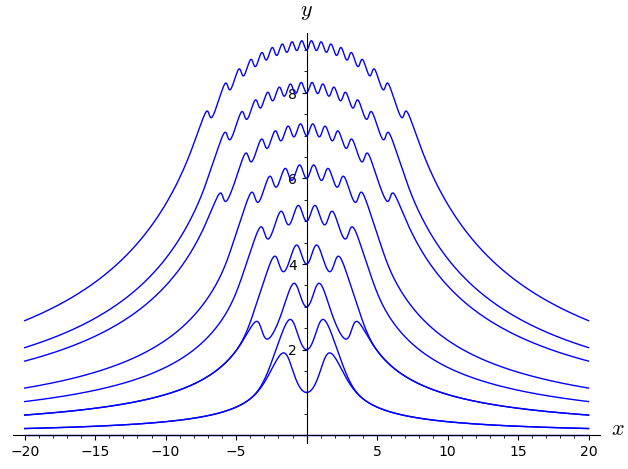

In [4]:
var('x,y,t')
sum([erk(Initial_problem([x,y],[1,sin(x*y)],[0,n],20),N=500).plot(x,y) for n in range(10)])+\
sum([erk(Initial_problem([x,y],[-1,-sin(x*y)],[0,n],20),N=500).plot(x,y) for n in range(10)])

Пусть имеется оду
$$
pdx+qdy=0
$$
и нам нужно найти его интеграл:
$$
u(x,y)=Const
$$
При этом
$$
du = \mu (pdx+qdy).
$$

Пусть имеется некоторое преобразование координат
$$
x_2=X(x_1,y_1), \quad y_2 = Y(x_1,y_1).
$$
Говорят, что это преобарзование является симметрией диффернециального уравнения, если оно переводит интегральные кривые в интегральные кривые. Это означает, что на любом решении 
$$
x=x(t), \quad y=y(t)
$$
верно
$$
u(X(x(t),y(t)),Y(x(t),y(t)))=Const.
$$
Поскольку все интегралы функционально зависимы, это означает, что 
$$
u(X(x,y),Y(x,y))=G(u(x,y)).
$$

Теорема. Если известно семейство таких симметрий вида
$$
X = x +\epsilon \xi(x,y)+\dots, \quad Y = y +\epsilon \eta(x,y)+\dots,
$$
где $\epsilon$ --  малый параметр, то множитель можно найти по формуле
$$
\mu = \frac{1}{p \xi + q \eta}.
$$

Док-во. 
$$
u(X,Y)=u(x,y)+(u_x \xi + u_y \eta) \epsilon +\dots = u(x,y)+\mu (p \xi + q \eta) \epsilon + \dots =G(u,\epsilon).
$$
Отсюда
$$
\mu = \frac{H(u)}{p \xi + q \eta}.
$$
Тепрь остатется вспомнить, что произведение интегрирующего множителя и  интеграла опять является интегрирующим множителем.

#### Однородные уравнения
Уравнение
$$
\frac{dy}{dx}=F\left(\frac{y}{x}\right)
$$
обладает симметрией вида
$$
X= x + \epsilon x +\dots, \quad Y=y+ \epsilon y.
$$
Отсюда:
$$
\xi= x, \quad \eta =y
$$
и
$$
\mu = \frac{1}{y + xF(y/x) }
$$

Не нужно приводить однородное уравнение к стандартному виду. Если 
$$
pdx+qdy=0
$$
имеет симметрию
$$
X= x + \epsilon x +\dots, \quad Y=y+ \epsilon y.
$$
то множитель равен
$$
\mu = \frac{1}{px+qy}.
$$

#### Пример
$$
dy + \left(\frac{y^2}{x^2}+1 \right)dx=0.
$$

In [32]:
var("x,y,dx,dy")
w=dy + (y^2/x^2+1)*dx 
[p,q]=coef(w,x,y)
mu=1/(q*y + p*x)
mu.factor()

x/(x^2 + x*y + y^2)

In [34]:
is_exact(w,x,y)

False

In [35]:
is_exact(mu*w,x,y)

True

#### Обобщенные однородные уравнения
Уравнение
$$
\frac{dy}{dx}=\frac{y}{x} F(x^n y)
$$
обладает симметрией вида
$$
X=k^{-1/n} x, \quad Y= k y
$$
Полагая $k=1+\epsilon$, мы имеем семейство
$$
X= x - \frac{\epsilon}{n}x +\dots, \quad Y=y+ \epsilon y.
$$
Отсюда:
$$
\xi= -\frac{x}{n}, \quad \eta =y
$$

Не нужно приводить однородное уравнение к стандартному виду. Если 
$$
pdx+qdy=0
$$
имеет симметрию
$$
X= x - \frac{\epsilon}{n} x +\dots, \quad Y=y+ \epsilon y.
$$
то множитель равен
$$
\mu = \frac{1}{qy-px/n}.
$$

Пример. Найдем множитель уравнения 
$$
x(y^2 - 3x)dy + (2y^3 - 5xy)dx = 0
$$

In [43]:
var("x,y,dx,dy,n")
w=x*(y^2 - 3*x)*dy + (2*y^3 - 5*x*y)*dx 
[p,q]=coef(w,x,y)
mu=1/(q*y - p*(x/n)).factor()
(diff(p*mu,y)-diff(q*mu,x)).factor()

-(2*n + 1)*n*y/(n*y^2 - 3*n*x - 2*y^2 + 5*x)^2

Отсюда опять $n=-1/2$.

#### Абак 
Чеб-Терраба, 2000-е годы, Maple

Поскольку все интегралы функционально зависимы
$$
u(X(x,y),Y(x,y))=G(u(x,y)).
$$
Отсюда
$$
u_x(X,Y) dX + u_y(X,Y) dY = G'(u) du 
$$
или, после сокращения на множитель $\mu$:
$$
p(X,Y) dX + q(X,Y) dY = G'(u) (pdx+qdy).
$$
Подставим в
$$
p(X,Y) dX + q(X,Y) dY
$$
выражения
$$
X = x +\epsilon \xi(x,y)+\dots, \quad Y = y +\epsilon \eta(x,y)+\dots,
$$
и найдем коэффциенты $P,Q$ при $\epsilon dx$ и $\epsilon dy$. 
$$
p(X,Y) dX + q(X,Y) dY=pdx+qdy+\epsilon (Pdx+Qdy)+\dots= G'(u) (pdx+qdy).
$$
Тогда
$$
\det 
\begin{pmatrix}
P & Q\\
p & q
\end{pmatrix} =0.
$$

#### Алгебарический метода отыскания симметрий
Простейший путь -- искать $\xi, \eta$ среди многочленов заданной небольшой степени. 

Пример (Камке, № 236). Найдем $\xi, \eta$ для
$$
x(y+4)dy -(y^2+2y+2x)dx =0
$$
среди многочленов 2-ой степени. Задаем форму и $\xi, \eta$ как многочлены с неопределенными коэффцициентами:

In [44]:
var("x,y,dx,dy")
eps=var('epsilon')
w=x*(y+4)*dy -(y^2+2*y+2*x)*dx 
[p,q]=coef(w,x,y)
m=[1,x,y,x^2,x*y,y^2]
a=var(['a'+str(n) for n in range(len(m))])
xi=sum([aa*mm for (aa,mm) in zip(a,m)])
b=var(['b'+str(n) for n in range(len(m))])
eta=sum([bb*mm for (bb,mm) in zip(b,m)])

Задаем X и Y, опуская члены $O(\epsilon^2)$:

In [45]:
X=x+eps*xi
Y=y+eps*eta

Задаем дифференциал:

In [46]:
D=lambda u: diff(u,x)*dx+diff(u,y)*dy
D(Y)

(2*b3*x + b4*y + b1)*dx*epsilon + ((b4*x + 2*b5*y + b2)*epsilon + 1)*dy

Раскладываем
$$
p(X,Y)dX+q(X,Y)dY
$$
в ряд Тейлора с точностью до $O(\epsilon^2)$:

In [49]:
lw=w.subs({x:X,y:Y,dx:D(X),dy:D(Y)}).taylor(eps,0,1)
lw

-dx*y^2 + (b3*dy*x^3 - ((a4 + 2*b5)*dx + a5*dy)*y^3 - (6*(a3 - b3)*dx - (4*a3 - 2*a4 + b1 + 4*b4)*dy)*x^2 - ((a1 + 2*a4 + 2*a5 + 2*b2 + 2*b5)*dx + ((2*a3 + b4)*dx - 3*b5*dy)*x)*y^2 - 2*(a0 + b0)*dx + 4*a0*dy - (2*(2*a1 - b1)*dx - (4*a1 - 2*a2 + b0 + 4*b2)*dy)*x + ((a3 + 2*b4)*dy*x^2 - 2*(a1 + a2 + b0 + b2)*dx + (a0 + 2*a2)*dy - ((4*a3 + 4*a4 + b1 - 2*b4)*dx - (a1 + 2*a4 - 4*a5 + 2*b2 + 8*b5)*dy)*x)*y)*epsilon - 2*(dx - 2*dy)*x + (dy*x - 2*dx)*y

Находим коэффциент при $\epsilon$:

In [50]:
lw.coefficient(eps).expand()

b3*dy*x^3 + a3*dy*x^2*y + 2*b4*dy*x^2*y - 2*a3*dx*x*y^2 - b4*dx*x*y^2 + 3*b5*dy*x*y^2 - a4*dx*y^3 - 2*b5*dx*y^3 - a5*dy*y^3 - 6*a3*dx*x^2 + 6*b3*dx*x^2 + 4*a3*dy*x^2 - 2*a4*dy*x^2 + b1*dy*x^2 + 4*b4*dy*x^2 - 4*a3*dx*x*y - 4*a4*dx*x*y - b1*dx*x*y + 2*b4*dx*x*y + a1*dy*x*y + 2*a4*dy*x*y - 4*a5*dy*x*y + 2*b2*dy*x*y + 8*b5*dy*x*y - a1*dx*y^2 - 2*a4*dx*y^2 - 2*a5*dx*y^2 - 2*b2*dx*y^2 - 2*b5*dx*y^2 - 4*a1*dx*x + 2*b1*dx*x + 4*a1*dy*x - 2*a2*dy*x + b0*dy*x + 4*b2*dy*x - 2*a1*dx*y - 2*a2*dx*y - 2*b0*dx*y - 2*b2*dx*y + a0*dy*y + 2*a2*dy*y - 2*a0*dx - 2*b0*dx + 4*a0*dy

Получилось выражение вида Pdx+Qdy. Составляем определитель Qp-Pq, который должен быть равен нулю:

In [51]:
leq=lw.coefficient(eps).coefficient(dy)*p-lw.coefficient(eps).coefficient(dx)*q
leq

((a4 + 2*b5)*y^3 + 6*(a3 - b3)*x^2 + ((2*a3 + b4)*x + a1 + 2*a4 + 2*a5 + 2*b2 + 2*b5)*y^2 + 2*(2*a1 - b1)*x + ((4*a3 + 4*a4 + b1 - 2*b4)*x + 2*a1 + 2*a2 + 2*b0 + 2*b2)*y + 2*a0 + 2*b0)*x*(y + 4) - (b3*x^3 + 3*b5*x*y^2 - a5*y^3 + (4*a3 - 2*a4 + b1 + 4*b4)*x^2 + (4*a1 - 2*a2 + b0 + 4*b2)*x + ((a3 + 2*b4)*x^2 + (a1 + 2*a4 - 4*a5 + 2*b2 + 8*b5)*x + a0 + 2*a2)*y + 4*a0)*(y^2 + 2*x + 2*y)

Приравниваем нулю коэффциенты при всех мономах $x^a y^b$ и решаем СЛАУ:

In [52]:
[SR(eq)==0 for eq in QQ[a+b][x,y](leq).coefficients()]

[-b3 == 0,
 a3 - b4 == 0,
 a4 - b5 == 0,
 a5 == 0,
 -2*b3 == 0,
 4*a3 - 8*b3 - 4*b4 == 0,
 6*a3 + 6*a4 - 6*b4 - 6*b5 == 0,
 4*a4 + 8*a5 - 4*b5 == 0,
 2*a5 == 0,
 16*a3 + 4*a4 - 2*b1 - 24*b3 - 8*b4 == 0,
 2*a1 + 8*a3 + 16*a4 + 8*a5 - 4*b2 - 16*b4 - 16*b5 == 0,
 4*a2 + 4*a4 + 16*a5 + b0 + 2*b2 - 8*b5 == 0,
 -a0 - 2*a2 == 0,
 8*a1 + 4*a2 - 2*b0 - 8*b1 - 8*b2 == 0,
 8*a2 + 8*b0 == 0,
 -6*a0 - 4*a2 == 0,
 8*b0 == 0,
 -8*a0 == 0]

In [53]:
S=solve([SR(eq) for eq in QQ[a+b][x,y](leq).coefficients()],a+b)[0]
S

[a0 == 0,
 a1 == r1,
 a2 == 0,
 a3 == r2,
 a4 == 1/4*r1 - r2,
 a5 == 0,
 b0 == 0,
 b1 == 1/2*r1 + 2*r2,
 b2 == 1/2*r1 - 2*r2,
 b3 == 0,
 b4 == r2,
 b5 == 1/4*r1 - r2]

Несмотря на то, что получилось бесконечно много решений, множитель получается один единственный:

In [54]:
(p*xi.subs(S)+ q*eta.subs(S)).factor()

-2*r2*(x - y)*(x - 2*y - 4)*x

Проверяем:

In [55]:
mu = 1/((x - y)*(x - 2*y - 4)*x)
is_exact(w*mu,x,y)

True

#### Абак Чеб-Терраба

Семейство алгоритмов, позволяющих отыскивать симметрии средствами компьютерной алгебры, было разработано недавно, в 1990-х группой под руководством Чеб-Терраб (E.S. Cheb-Terrab) на базе Maple,  пакет получил называние DETools; на данный момент этот пакет способен вычислить подавляющее большинство примеров собранных в справочнике Камке.

Ссылка:
*  E.S. Cheb-Terrab. Computer Algebra Solving of First Order ODEs. // Computer physics Communications, 101 (1997). Pag. 254.

Основные алгоритмы можно разделить на две группы.

* Алгебраический способ, когда пару $\xi, \eta$ считают рациональными функциями небольшой степени и определяют их коэффициенты из условия точности формы
$$
\frac{pdx+qdy}{p\xi + q \eta}.
$$
* Абак, когда пары $\xi, \eta$ считают неизвестными функциями одной переменной или произведением таких функций. При этом оказывается, что за конечное число действий можно было выяснить, имеет ли заданное дифференциальное уравнение такие симметрии или нет. В качестве таковых используют: 
$$
\begin{aligned}
& \{ \xi=0,\,\eta=f(x) \}, \quad \{ \xi=0,\,\eta=f(y) \}, \\
& \{ \xi=f(x),\,\eta=0 \}, \quad \{ \xi=f(y),\,\eta=0 \},
\end{aligned}
$$
затем более сложные
$$
\begin{aligned}
& \{ \xi=0,\,\eta=f(x)\,g(y) \}, \quad \{ \xi=f(x)\,g(y),\,\eta=0 \}, \\
& \{ \xi=0,\,\eta=f(y)+g(x) \}, \quad \{ \xi= f(y)+g(x),\,\eta=0 \}
\end{aligned}
$$
и т.д.  

Идея Абака -- пары $\xi, \eta$ считают неизвестными функциями одной переменной -- восходит к Мозесу, имеет очевидную связс с CAN. 

В этом справочнике собрано 576 уравнений первого порядка, из которых для тестов были отобраны 552. С большей частью из них DETools справился, при этом во время этой работы выяснилось удивительное обстоятельство: 78\% из 552 уравнений, в том числе самые распространенные, имеют симметрии одного и того же вида:
$$
\xi=f(x), \quad \eta=p(x)y+q(x).
$$

Ссылка:
* E.S. Cheb-Terrab, T. Kolokolnikov. First order ODEs, Symmetries and Linear Transformations. // European Journal of Applied Mathematics, Vol. 14, No. 2, pp. 231-246 (2003).

Со справочником Камке справились, что дальше?